In [1]:
import numpy as np
import pandas as pd
import os
import sklearn

# Reading Data

In [2]:
def segmentWords(s): 
    return s.split()

def readFile(fileName):
    # Function for reading file
    # input: filename as string
    # output: contents of  file as list containing single words
    contents = []
    f = open(fileName, encoding="latin1")
    for line in f:
        contents.append(line)
    f.close()
    result = segmentWords('\n'.join(contents))
    return result

#### Create a Dataframe containing the counts of each word in a file

In [4]:
#Append all files to list
d = []

for c in os.listdir("data_training"):
    directory = "data_training/" + c
    for file in os.listdir(directory):
        words = readFile(directory + "/" + file)
        e = {x:words.count(x) for x in words}
        e['__FileID__'] = file
        e['__CLASS__'] = directory[14:]
        d.append(e)

Create a dataframe from d - make sure to fill all the nan values with zeros.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html


In [5]:
#Convert to DataFrame
df = pd.DataFrame(data=d, index=range(1, len(d)+1))

In [6]:
#Remove non alphanumeric characters
df.columns = df.columns.str.replace('[^a-zA-Z]', '')
#Fill NaN with 0
df.fillna(value=0, inplace=True)
#Combine similar words
df=df.groupby(lambda x:x, axis=1).sum()
df.head()

,,CLASS,FileID,a,aaa,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,...,zuko,zukovsky,zulu,zundel,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie
1,137.0,neg,cv000_29416.txt,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,neg,cv001_19502.txt,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64.0,neg,cv002_17424.txt,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90.0,neg,cv003_12683.txt,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,123.0,neg,cv004_12641.txt,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split data into training and validation set 

* Sample 80% of your dataframe to be the training data

* Let the remaining 20% be the validation data (you can filter out the indicies of the original dataframe that weren't selected for the training data)

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [14]:
# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

num_samples = df.shape[0]

# Create a training and validation set using a 80:20 split
train, test = df.loc[0:0.8*num_samples, :], df.loc[0.8*num_samples:, :]

* Split the dataframe for both training and validation data into x and y dataframes - where y contains the labels and x contains the words

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [15]:
# The input data should only consist of words and their counts
x_train = train.loc[:, (df.columns!="") & (df.columns!="CLASS") & (df.columns!="FileID")]
x_test = test.loc[:, (df.columns!="") & (df.columns!="CLASS") & (df.columns!="FileID")]

# The output data should only consist of their classes
y_train = train.loc[:, df.columns=="CLASS"]
y_test = test.loc[:, df.columns=="CLASS"]

# Logistic Regression

#### Basic Logistic Regression
* Use sklearn's linear_model.LogisticRegression() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [72]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
print("Training a Logistic Regression Model...")
logreg.fit(x_train, y_train)
training_accuracy = logreg.score(x_train, y_train)
print("Training accuracy: ", training_accuracy)
test_accuracy = logreg.score(x_test, y_test)
print("Test accuracy: ", test_accuracy, "\n")

Training a Logistic Regression Model...


C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy:  1.0
Test accuracy:  0.86875 



#### Changing Parameters

In [84]:
# Creating values of C to test
C = np.logspace(-4,2,20)

#Setting  blank variables
training_c_ac = np.zeros(len(C))
test_c_ac = np.zeros(len(C))

#Iterating through values of C to find out the testing & training accuracy for each
i=0
for c_val in C:
    logreg = LogisticRegression(C = c_val)
    logreg.fit(x_train, y_train)
    training_c_ac[i] = logreg.score(x_train, y_train)
    test_c_ac[i] = logreg.score(x_test, y_test)
    i +=1

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


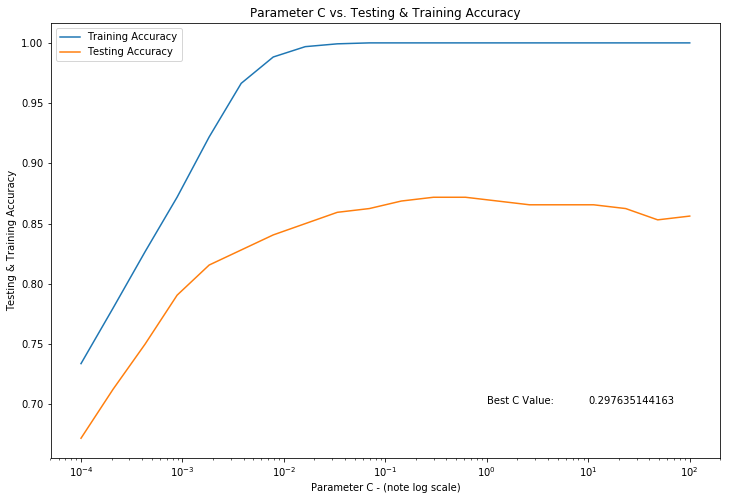

In [96]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline

#Plotting C vs accuracies
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(C,training_c_ac, label = "Training Accuracy")
ax.plot(C,test_c_ac, label = "Testing Accuracy")
ax.set_xlabel("Parameter C - (note log scale)")
ax.set_ylabel("Testing & Training Accuracy")
ax.set_title("Parameter C vs. Testing & Training Accuracy")
ax.set_xscale('log')
ax.legend()

#Finding best C value
best_C_index = test_c_ac.tolist().index(test_c_ac.max())
best_C = C[best_C_index]

#Annotating graoh with best C value
ax.annotate("Best C Value:",(1,.7))
ax.annotate(best_C,(10,.7))
plt.show()

#### Feature Selection
* In the backward stepsize selection method, you can remove coefficients and the corresponding x columns, where the coefficient is more than a particular amount away from the mean - you can choose how far from the mean is reasonable.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html

In [97]:
#Outputting weights parameter, taking the absolute value and normalizing it between 0 and 1
coeff = logreg.coef_
abs_coeff = np.abs(coeff[0])
norm = max(abs_coeff)
normalized_abs_coeff = abs_coeff/norm

#Setting blank variables
thresh = np.linspace(0,0.03)
wordscut = np.zeros(len(thresh))
training_ac = np.zeros(len(thresh))
testing_ac = np.zeros(len(thresh))
i=0;

for threshold in thresh:
    # Get the indices of the features to remove

    #print("The cutoff threshold to keep a feature is if its normalized coefficient is > ", threshold)
    indices = [i for i in range(len(normalized_abs_coeff)) if np.abs(normalized_abs_coeff[i]) < threshold]
    # Get the column names corresponding to those indices
    column_names = [x_train.columns[index] for index in indices]
    # Drop those features from the training and test matrix
    x_train_new = x_train.drop(column_names, axis=1)
    x_test_new = x_test.drop(column_names, axis=1)

    wordscut[i]=len(indices)

    logreg_new = LogisticRegression(C = best_C)
    #print("Training a Logistic Regression Model...")
    logreg_new.fit(x_train_new, y_train)
    training_accuracy = logreg_new.score(x_train_new, y_train)
    training_ac[i] =  training_accuracy
    test_accuracy = logreg_new.score(x_test_new, y_test)
    testing_ac[i] = test_accuracy
    i +=1

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


How did you select which features to remove? Why did that reduce overfitting?

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


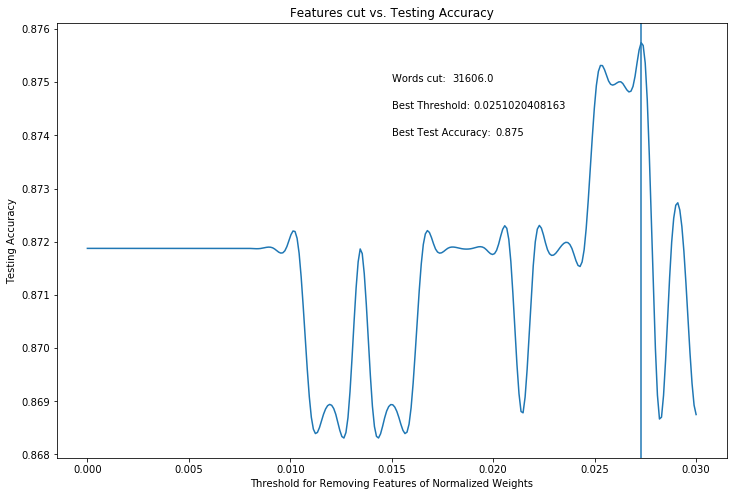

In [107]:
#Graphing Features Cut vs. Testing Accuracies
#Making graph smooth
xnew = np.linspace(thresh.min(),thresh.max(),300)
power_smooth = spline(thresh,testing_ac,xnew)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xnew, power_smooth)
ax.set_xlabel("Threshold for Removing Features of Normalized Weights")
ax.set_ylabel("Testing Accuracy")
ax.set_title("Features cut vs. Testing Accuracy")

#Finding Best Values of Threshold, Accuracy & Number of words cut
best_x = xnew[power_smooth.tolist().index(power_smooth.max())]
best_thresh_index = testing_ac.tolist().index(testing_ac.max())

#Anotating graph
ax.axvline(x=best_x)
ax.annotate("Words cut:",(.015,.875))
ax.annotate(wordscut[best_thresh_index],(0.018,.875))
ax.annotate("Best Threshold:",(.015,.8745))
ax.annotate(thresh[best_thresh_index],(.019,.8745))
ax.annotate("Best Test Accuracy:",(.015,.874))
ax.annotate(testing_ac.max(),(.0201,.874))
plt.show()

# Single Decision Tree

#### Basic Decision Tree

* Initialize your model as a decision tree with sklearn.
* Fit the data and labels to the model.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [108]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
print("Training a Decision Tree Classifier...")
dtc.fit(x_train, y_train)
training_accuracy = dtc.score(x_train, y_train)
print("Training accuracy: ", training_accuracy)
test_accuracy = dtc.score(x_test, y_test)
print("Test accuracy: ", test_accuracy, "\n")

Training a Decision Tree Classifier...
Training accuracy:  1.0
Test accuracy:  0.65 



#### Changing Parameters
* To test out which value is optimal for a particular parameter, you can either loop through various values or look into sklearn.model_selection.GridSearchCV

References:


http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [173]:
square_matrix = [300,3900,7800,11700,15600,19500,23400,27300,31200,35100]
max_depth_v = square_matrix
features_v = square_matrix

test_scores_dtc = pd.DataFrame(columns=['depth','features','score'], index=[np.arange(0,len(max_depth_v)*len(features_v))])

i=0
for depth in max_depth_v:
    for features in features_v:
        dtc = DecisionTreeClassifier(max_features=features, max_depth=depth)
        dtc.fit(x_train, y_train)
        test_accuracy = dtc.score(x_test, y_test)
        test_scores_dtc.loc[i] = pd.Series({'depth':depth, 'features':features, 'score':test_accuracy,})
        
        i+=1

In [174]:
test_df = test_scores_dtc.pivot(index='depth', columns='features', values='score')
test_df = test_df[test_df.columns].astype(float)

How did you choose which parameters to change and what value to give to them? Feel free to show a plot.

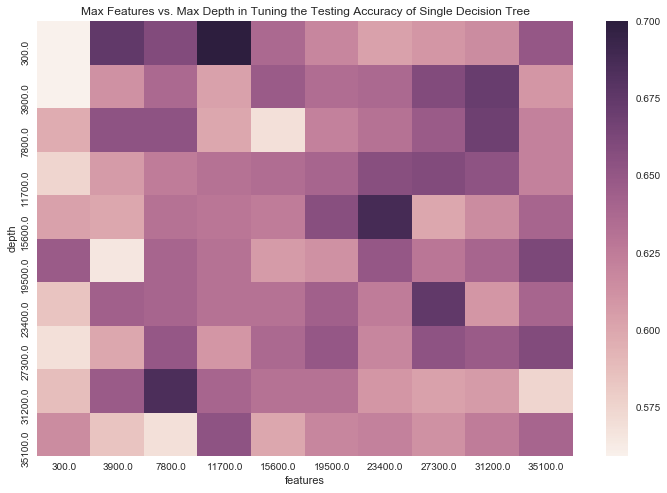

In [176]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(test_df)

ax.set_title("Max Features vs. Max Depth in Tuning the Testing Accuracy of Single Decision Tree")

plt.show()

Why is a single decision tree so prone to overfitting?

# Random Forest Classifier

#### Basic Random Forest

* Use sklearn's ensemble.RandomForestClassifier() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [178]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
print("Training a Random Forest Classifier...")
rfc.fit(x_train, y_train)
training_accuracy = rfc.score(x_train, y_train)
print("Training accuracy: ", training_accuracy)
test_accuracy = rfc.score(x_test, y_test)
print("Test accuracy: ", test_accuracy, "\n")

Training a Random Forest Classifier...


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training accuracy:  0.989071038251
Test accuracy:  0.71875 



#### Changing Parameters

In [179]:
test_scores_rfc = pd.DataFrame(columns=['depth','features','score'], index=[np.arange(0,len(max_depth_v)*len(features_v))])

i=0
for depth in max_depth_v:
    for features in features_v:
        rfc = RandomForestClassifier(max_features=features, max_depth=depth)
        rfc.fit(x_train, y_train)
        test_accuracy = rfc.score(x_test, y_test)
        test_scores_rfc.loc[i] = pd.Series({'depth':depth, 'features':features, 'score':test_accuracy,})
        
        i+=1
        
test_df_rfc = test_scores_rfc.pivot(index='depth', columns='features', values='score')
test_df_rfc = test_df_rfc[test_df_rfc.columns].astype(float)

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_lau

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_lau

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_lau

What parameters did you choose to change and why?

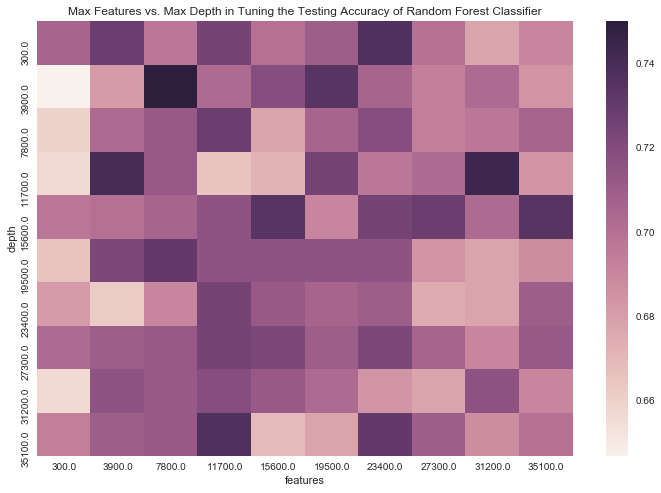

In [181]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(test_df_rfc)

ax.set_title("Max Features vs. Max Depth in Tuning the Testing Accuracy of Random Forest Classifier")

plt.show()

How does a random forest classifier prevent overfitting better than a single decision tree?